In [1]:
import os
SPARK_HOME="/opt/spark"
os.environ["PYSPARK_PYTHON"] = "python3"
# os.environ["PYSPARK_PYTHON"]="python"
os.environ["PYSPARK_DRIVER_PYTHON"]="jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"]="notebook"
os.environ["SPARK_HOME"] = SPARK_HOME
os.environ["SPARK_CLASSPATH"] = "/opt/spark/jars/sqljdbc4.jar"

 

from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Kmeans_Clustering") \
        .getOrCreate()

In [2]:
from pyspark.sql import SQLContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from notebook import utils
%matplotlib inline

In [2]:
df_path = "/home/rupeshr/Desktop/TSA_Python/cluster.csv"
df = spark.read.format("com.databricks.spark.csv").option("header", "true").option("inferSchema", "true").load(df_path)
df.show()

+------------------+----------------------+
|Annual Income (k$)|Spending Score (1-100)|
+------------------+----------------------+
|                15|                    39|
|                15|                    81|
|                16|                     6|
|                16|                    77|
|                17|                    40|
|                17|                    76|
|                18|                     6|
|                18|                    94|
|                19|                     3|
|                19|                    72|
|                19|                    14|
|                19|                    99|
|                20|                    15|
|                20|                    77|
|                20|                    13|
|                20|                    79|
|                21|                    35|
|                21|                    66|
|                23|                    29|
|                23|            

In [4]:
df.count() 

200

In [3]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Annual Income (k$),200,60.56,26.26472116527124,15,137
Spending Score (1-100),200,50.2,25.823521668370173,1,99


In [25]:
workingdf=df.drop('Genre').drop('Age').drop('CustomerID')
workingdf.show()

+------------------+----------------------+
|Annual Income (k$)|Spending Score (1-100)|
+------------------+----------------------+
|                15|                    39|
|                15|                    81|
|                16|                     6|
|                16|                    77|
|                17|                    40|
|                17|                    76|
|                18|                     6|
|                18|                    94|
|                19|                     3|
|                19|                    72|
|                19|                    14|
|                19|                    99|
|                20|                    15|
|                20|                    77|
|                20|                    13|
|                20|                    79|
|                21|                    35|
|                21|                    66|
|                23|                    29|
|                23|            

In [40]:
workingdf.columns

['Annual Income (k$)', 'Spending Score (1-100)']

In [46]:
featureUsed=['Annual Income (k$)', 'Spending Score (1-100)']
assembler=VectorAssembler(inputCols=featureUsed, outputCol='feature_unscaled')
assembled=assembler.transform(workingdf)
assembled.show()

+------------------+----------------------+----------------+
|Annual Income (k$)|Spending Score (1-100)|feature_unscaled|
+------------------+----------------------+----------------+
|                15|                    39|     [15.0,39.0]|
|                15|                    81|     [15.0,81.0]|
|                16|                     6|      [16.0,6.0]|
|                16|                    77|     [16.0,77.0]|
|                17|                    40|     [17.0,40.0]|
|                17|                    76|     [17.0,76.0]|
|                18|                     6|      [18.0,6.0]|
|                18|                    94|     [18.0,94.0]|
|                19|                     3|      [19.0,3.0]|
|                19|                    72|     [19.0,72.0]|
|                19|                    14|     [19.0,14.0]|
|                19|                    99|     [19.0,99.0]|
|                20|                    15|     [20.0,15.0]|
|                20|    

In [47]:
from pyspark.ml.feature import PCA
pca = PCA(k=2, inputCol="feature_unscaled", outputCol="pcaFeatures")
model = pca.fit(assembled)
result = model.transform(assembled)

In [48]:
result.show()

+------------------+----------------------+----------------+--------------------+
|Annual Income (k$)|Spending Score (1-100)|feature_unscaled|         pcaFeatures|
+------------------+----------------------+----------------+--------------------+
|                15|                    39|     [15.0,39.0]|[-24.673378469271...|
|                15|                    81|     [15.0,81.0]|[-35.652563181047...|
|                16|                     6|      [16.0,6.0]|[-17.012104278193...|
|                16|                    77|     [16.0,77.0]|[-35.572154624291...|
|                17|                    40|     [17.0,40.0]|[-26.865243793997...|
|                17|                    76|     [17.0,76.0]|[-36.275973546947...|
|                18|                     6|      [18.0,6.0]|[-18.942560443115...|
|                18|                    94|     [18.0,94.0]|[-41.946566505883...|
|                19|                     3|      [19.0,3.0]|[-19.123561046162...|
|               

In [6]:
rdd=df.rdd.map(list)

In [4]:
from numpy import array
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel

In [5]:
rdd = df.rdd.map(list)
for x in rdd.collect():
    print(x)

[15, 39]
[15, 81]
[16, 6]
[16, 77]
[17, 40]
[17, 76]
[18, 6]
[18, 94]
[19, 3]
[19, 72]
[19, 14]
[19, 99]
[20, 15]
[20, 77]
[20, 13]
[20, 79]
[21, 35]
[21, 66]
[23, 29]
[23, 98]
[24, 35]
[24, 73]
[25, 5]
[25, 73]
[28, 14]
[28, 82]
[28, 32]
[28, 61]
[29, 31]
[29, 87]
[30, 4]
[30, 73]
[33, 4]
[33, 92]
[33, 14]
[33, 81]
[34, 17]
[34, 73]
[37, 26]
[37, 75]
[38, 35]
[38, 92]
[39, 36]
[39, 61]
[39, 28]
[39, 65]
[40, 55]
[40, 47]
[40, 42]
[40, 42]
[42, 52]
[42, 60]
[43, 54]
[43, 60]
[43, 45]
[43, 41]
[44, 50]
[44, 46]
[46, 51]
[46, 46]
[46, 56]
[46, 55]
[47, 52]
[47, 59]
[48, 51]
[48, 59]
[48, 50]
[48, 48]
[48, 59]
[48, 47]
[49, 55]
[49, 42]
[50, 49]
[50, 56]
[54, 47]
[54, 54]
[54, 53]
[54, 48]
[54, 52]
[54, 42]
[54, 51]
[54, 55]
[54, 41]
[54, 44]
[54, 57]
[54, 46]
[57, 58]
[57, 55]
[58, 60]
[58, 46]
[59, 55]
[59, 41]
[60, 49]
[60, 40]
[60, 42]
[60, 52]
[60, 47]
[60, 50]
[61, 42]
[61, 49]
[62, 41]
[62, 48]
[62, 59]
[62, 55]
[62, 56]
[62, 42]
[63, 50]
[63, 46]
[63, 43]
[63, 48]
[63, 52]
[63, 54

In [8]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("data/mllib/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

In [10]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [12]:
km = KMeans().setK(2).setSeed(1)
model = km.fit(df)


Exception ignored in: <function JavaWrapper.__del__ at 0x7f243a349840>
Traceback (most recent call last):
  File "/opt/spark/python/pyspark/ml/wrapper.py", line 42, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'ClusteringEvaluator' object has no attribute '_java_obj'


IllegalArgumentException: features does not exist. Available: Annual Income (k$), Spending Score (1-100)

In [9]:
evaluator = ClusteringEvaluator(df)

TypeError: Method __init__ forces keyword arguments.

In [27]:
clusters = KMeans.train(rdd, k=2)# maxIterations=10, initializationMode="random")
print(clusters)

In [26]:
costs = rdd.map(lambda x: clusters.computeCost(x[1]))
print(costs)

PythonRDD[3166] at RDD at PythonRDD.scala:53


In [28]:
WSSSE=clusters.computeCost(rdd)
#WSSSE = rdd.map(lambda point: error(clusters,point)).reduce(lambda x, y: x + y)
print(WSSSE)

186206.760022586


In [21]:
from pyspark.mllib.clustering import GaussianMixture, GaussianMixtureModel
clusters = GaussianMixture.train(rdd, 2)

In [22]:
clusters.computeCost(rdd)

AttributeError: 'GaussianMixtureModel' object has no attribute 'computeCost'

In [43]:
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [44]:
WSSSE = rdd.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 5141.802201232704


In [12]:
def error(clusters,point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [20]:
def WCSS(data, clusters):
    wsseList = []
    for k in clusters:
        print("Training for cluster size {} ".format(k))
        clusters = KMeans.train(data, k)
        WSSSE = clusters.computeCost(data)#data.map(lambda point: error(clusters,point)).reduce(lambda x, y: x + y)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        wsseList.append(WSSSE)
    return wsseList
wsseList=WCSS(rdd,range(2,11))      

Training for cluster size 2 
Within Set Sum of Squared Error = 181665.82312925166
Training for cluster size 3 
Within Set Sum of Squared Error = 132087.72428243398
Training for cluster size 4 
Within Set Sum of Squared Error = 73880.64496247192
Training for cluster size 5 
Within Set Sum of Squared Error = 89897.46144527977
Training for cluster size 6 
Within Set Sum of Squared Error = 37455.98455516027
Training for cluster size 7 
Within Set Sum of Squared Error = 33869.428028278024
Training for cluster size 8 
Within Set Sum of Squared Error = 27476.491106719353
Training for cluster size 9 
Within Set Sum of Squared Error = 24903.989065067322
Training for cluster size 10 
Within Set Sum of Squared Error = 21660.90996057514


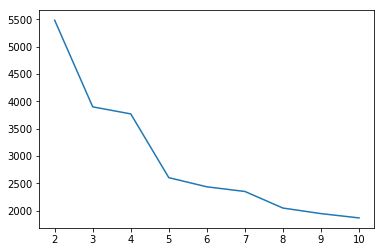

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),wsseList)

In [ ]:
Training for cluster size 2 
Within Set Sum of Squared Error = 5335.08216702424
Training for cluster size 3 
Within Set Sum of Squared Error = 3899.7055127003114
Training for cluster size 4 
Within Set Sum of Squared Error = 3302.7700174795536
Training for cluster size 5 
Within Set Sum of Squared Error = 2604.02527015835
Training for cluster size 6 
Within Set Sum of Squared Error = 2498.1444225381733
Training for cluster size 7 
Within Set Sum of Squared Error = 2293.5893978631952
Training for cluster size 8 
Within Set Sum of Squared Error = 2139.1906100815145
Training for cluster size 9 
Within Set Sum of Squared Error = 1919.8849008615443
Training for cluster size 10 
Within Set Sum of Squared Error = 1915.1072221295892

In [10]:
from pyspark.mllib.clustering import BisectingKMeans

def WCSS(data,clusters):
    wsccList=[]
    for k in clusters:
        model = BisectingKMeans.train(data, k) #, maxIterations=5
        cost = model.computeCost(data)
        print("Bisecting K-means Cost = " + str(cost))
        wsccList.append(cost)
    return wsccList
WCSS(rdd,range(2,11))

Bisecting K-means Cost = 183718.21400013665
Bisecting K-means Cost = 128833.73653198653
Bisecting K-means Cost = 102506.80712169778
Bisecting K-means Cost = 71571.44840324226
Bisecting K-means Cost = 51113.61408126454
Bisecting K-means Cost = 43931.023838174275
Bisecting K-means Cost = 42660.96828261871
Bisecting K-means Cost = 23982.409558010026
Bisecting K-means Cost = 22370.024028188334


[183718.21400013665,
 128833.73653198653,
 102506.80712169778,
 71571.44840324226,
 51113.61408126454,
 43931.023838174275,
 42660.96828261871,
 23982.409558010026,
 22370.024028188334]

In [ ]:
class optimalcluster(APIView):
    

In [11]:
featureUsed=['Annual Income (k$)', 'Spending Score (1-100)']
assembler=VectorAssembler(inputCols=featureUsed, outputCol='feature_unscaled')
assembled=assembler.transform(workingdf)

In [12]:
scaler=StandardScaler(inputCol='feature_unscaled', outputCol='features',withStd=True, withMean=True)
scalerModel=scaler.fit(assembled)
scaledData=scalerModel.transform(assembled)

In [15]:
scaledData=scaledData.select('features','CustomerID')
elbowset=scaledData.filter((scaledData.CustomerID % 2)==0).select('features')
elbowset.persist()

DataFrame[features: vector]

In [23]:
from itertools import cycle, islice
from math import sqrt
from numpy import array
#from pandas.tools.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
def elbow(elbowset, clusters):
	wsseList = []	
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = model.computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList

In [28]:
kmeans = KM(k = 2, seed = 1)

In [33]:
model = kmeans.fit(elbowset)
print(model)

KMeansModel: uid=KMeans_d16a8ba75e52, k=2, distanceMeasure=euclidean, numFeatures=2


In [36]:
transformed = model.transform(elbowset)
transformed.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.7346462470822...|         0|
|[-1.6965723610620...|         0|
|[-1.6584984750417...|         0|
|[-1.6204245890215...|         0|
|[-1.5823507030012...|         0|
|[-1.5823507030012...|         0|
|[-1.5442768169810...|         0|
|[-1.5442768169810...|         0|
|[-1.5062029309608...|         0|
|[-1.4300551589203...|         0|
|[-1.3919812729000...|         0|
|[-1.3539073868798...|         0|
|[-1.2396857288191...|         0|
|[-1.2396857288191...|         0|
|[-1.2016118427988...|         0|
|[-1.1635379567786...|         0|
|[-1.0493162987178...|         0|
|[-1.0493162987178...|         0|
|[-1.0112424126976...|         0|
|[-0.8970207546369...|         0|
+--------------------+----------+
only showing top 20 rows



In [32]:
featuresAndPrediction = transformed.select("features", "prediction")
featuresAndPrediction.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.7346462470822...|         0|
|[-1.6965723610620...|         0|
|[-1.6584984750417...|         0|
|[-1.6204245890215...|         0|
|[-1.5823507030012...|         0|
|[-1.5823507030012...|         0|
|[-1.5442768169810...|         0|
|[-1.5442768169810...|         0|
|[-1.5062029309608...|         0|
|[-1.4300551589203...|         0|
|[-1.3919812729000...|         0|
|[-1.3539073868798...|         0|
|[-1.2396857288191...|         0|
|[-1.2396857288191...|         0|
|[-1.2016118427988...|         0|
|[-1.1635379567786...|         0|
|[-1.0493162987178...|         0|
|[-1.0493162987178...|         0|
|[-1.0112424126976...|         0|
|[-0.8970207546369...|         0|
+--------------------+----------+
only showing top 20 rows



In [37]:
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))
error(featuresAndPrediction)

AttributeError: 'KMeansModel' object has no attribute 'centers'

In [42]:
elbow(elbowset,range(2,11))

Training for cluster size 2 


AttributeError: 'KMeansModel' object has no attribute 'computeCost'

In [63]:
from pyspark.ml.evaluation import ClusteringEvaluator
km = KM(k=2,seed=1)
model = km.fit(elbowset)
clus = model.transform(elbowset)
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(clus)
wsse = model.computeCost(elbowset)

AttributeError: 'KMeansModel' object has no attribute 'computeCost'

In [53]:
print(silhouette)
elbowset.dtypes

0.687117696120979


[('features', 'vector')]

In [62]:
center = model.centers[model.predict(elbowset)]

AttributeError: 'KMeansModel' object has no attribute 'centers'

In [ ]:
kmeans = KM(k = 2, seed = 1)
model = kmeans.fit(elbowset)
transformed = model.transform(elbowset)
Training for cluster size 2 
Within Set Sum of Squared Error = 5394.567794225921
Training for cluster size 3 
Within Set Sum of Squared Error = 3899.7055127003114
Training for cluster size 4 
Within Set Sum of Squared Error = 3302.7700174795536
Training for cluster size 5 
Within Set Sum of Squared Error = 3123.7558976976056
Training for cluster size 6 
Within Set Sum of Squared Error = 2420.097586507952
Training for cluster size 7 
Within Set Sum of Squared Error = 2179.1633394092155
Training for cluster size 8 
Within Set Sum of Squared Error = 2010.26248542168